# Cuaderno de Entrenamiento: Model Training

Este cuaderno guía el proceso de entrenamiento de un modelo de Stable Diffusion utilizando las imágenes preprocesadas y aumentadas.

# Instalamos librerías necesarias

In [1]:
! pip install peft xformers bitsandbytes transformers accelerate -q
! pip install git+https://github.com/huggingface/diffusers.git -q
! wget https://raw.githubusercontent.com/huggingface/diffusers/main/examples/dreambooth/train_dreambooth_lora.py
! pip install --upgrade torchtext
! pip install --upgrade torchaudio
! pip install --upgrade torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.7/222.7 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 10.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.1+cu121 requires torch==2.2.1, but you have torch 2.3.0 which is incompatible.
torchtext 0.17.1 requires torch==2.2.1, but you have torch 2.3.0 which is incompatible.
torchvision 0.17.1+cu121 requires torch==2.2.1, but you have torch

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

data_root="/content/drive/MyDrive/ACADEMICO/IA/Colab Notebooks/Sprint3/TFB/"
DATASET_FOLDER_NAME = data_root+"data/augmented"  # Complete with your own dataset folder name
print(DATASET_FOLDER_NAME)

/content/drive/MyDrive/ACADEMICO/IA/Colab Notebooks/Sprint3/TFB/data/augmented


In [4]:
! accelerate config default

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [5]:
from diffusers import AutoPipelineForText2Image
from diffusers import EulerAncestralDiscreteScheduler
import torch

import warnings
warnings.filterwarnings('ignore')

In [45]:
import os
datasets = {
    "cuadros-coleccion": "a photo in the style of cuadros de coleccion del barroco andino",
    "cuadros-figuras": "a photo in the style of cuadros de figuras del barroco andino",
    "esculturas": "a photo in the style of esculturas del barroco andino",
    "esculturas-coleccion": "a photo in the style of esculturas de coleccion del barroco andino",
    "murales": "a photo in the style of murales del barroco andino"
}


# Configuration of Training
base_command = (
    "! accelerate launch train_dreambooth_lora.py "
    "--pretrained_model_name_or_path='CompVis/stable-diffusion-v1-4' "
    "--resolution=512 "
    "--max_train_steps=1000 "
    "--checkpointing_steps=300 "
    "--mixed_precision='fp16' "
    "--dataloader_num_workers=8 "
    "--train_batch_size=2 "
    "--gradient_accumulation_steps=1 "
    "--learning_rate=1e-4 "
    "--lr_scheduler='constant' "
    "--lr_warmup_steps=0 "
    "--lr_warmup=0 "
    "--num_train_epochs=1 "
    "--seed=1234 "
    "--use_8bit_adam "
    "--train_text_encoder "
)


# Execute Training for Each Folder and Style
for folder, prompt in datasets.items():
    instance_data_dir = os.path.join(DATASET_FOLDER_NAME, folder)  # Combining variable with folder name
    output_dir = f"{data_root}/models/{folder}_lora/"
    if not os.access(output_dir, os.W_OK):
        print(f"Warning: No write permission for {output_dir}. Training might not save models.")

    os.chmod(output_dir, 0o755)  # Grant write permissions for user, group, and others (adjust as needed)
    command = (
        base_command +
        f"--instance_data_dir='{instance_data_dir}' "
        f"--output_dir='{output_dir}' "
        f"--instance_prompt='{prompt}'"
    )
    os.system(command)

print("Training Completed!")  # Added a message to indicate completion

Training Completed!


In [6]:
pipeline = AutoPipelineForText2Image.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16).to("cuda")


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [7]:
pipeline.load_lora_weights("/content/drive/MyDrive/ACADEMICO/IA/Colab Notebooks/Sprint3/TFB//models/cuadros-coleccion_lora/", weight_name="pytorch_lora_weights.safetensors")
pipeline.scheduler=EulerAncestralDiscreteScheduler.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="scheduler")

  0%|          | 0/50 [00:00<?, ?it/s]

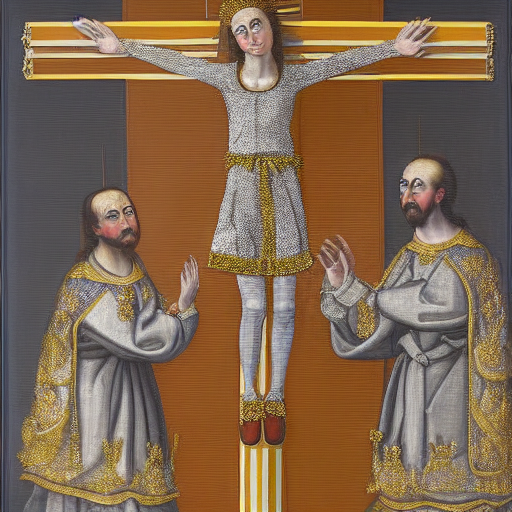

In [12]:
image = pipeline("Madrid in the style of cuadros de coleccion del barroco andino").images[0]
image